In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [228]:
df = pd.read_csv("/content/Flight_Booking.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# **EDA(Exploratory Data Analysis)**

In [229]:
# Removing the unnecessary column from table
df.drop(["Unnamed: 0"], axis = 1,inplace=True)

In [230]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [231]:
df.shape # Checking the count of Rows and Columns is available in dataset

(300153, 11)

In [232]:
df.info() # It will show the short summary about data in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [233]:
df.isna().sum() # There is no null values is present in dataset

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [234]:
df.duplicated().sum() # There is no duplicates of the data in dataset.

np.int64(0)

In [235]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


# ***Data Visualization***

In [236]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

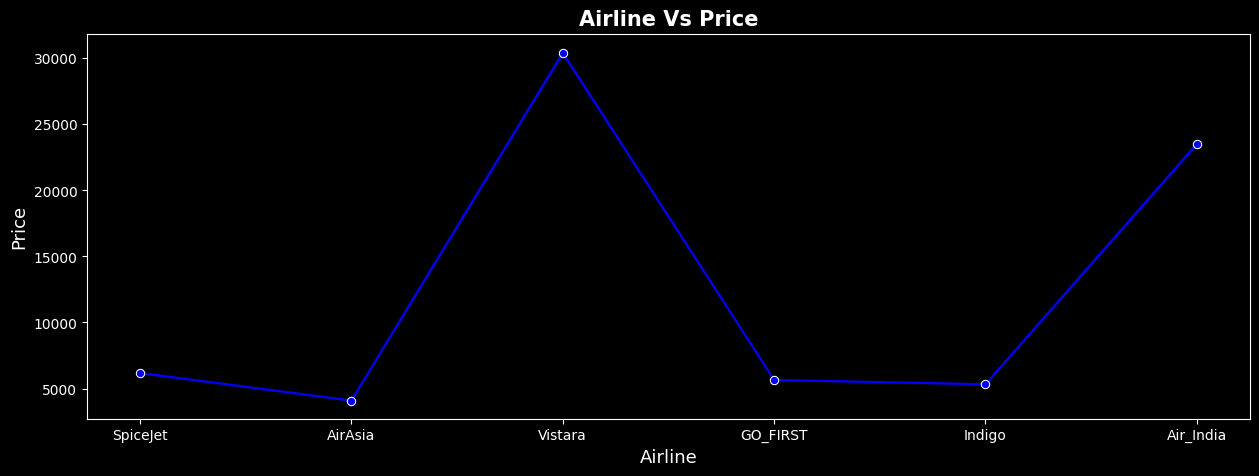

In [237]:
# Checkking the variation in price with different Airline Company through  lineplot

plt.style.use('dark_background')
plt.figure(figsize= (15,5))
sns.lineplot(data=df,x="airline",y="price", color = "blue",marker = "o")
plt.title("Airline Vs Price",fontweight = 'bold',fontsize = 15)
plt.xlabel("Airline", fontsize = 13)
plt.ylabel("Price", fontsize = 13)
plt.show()

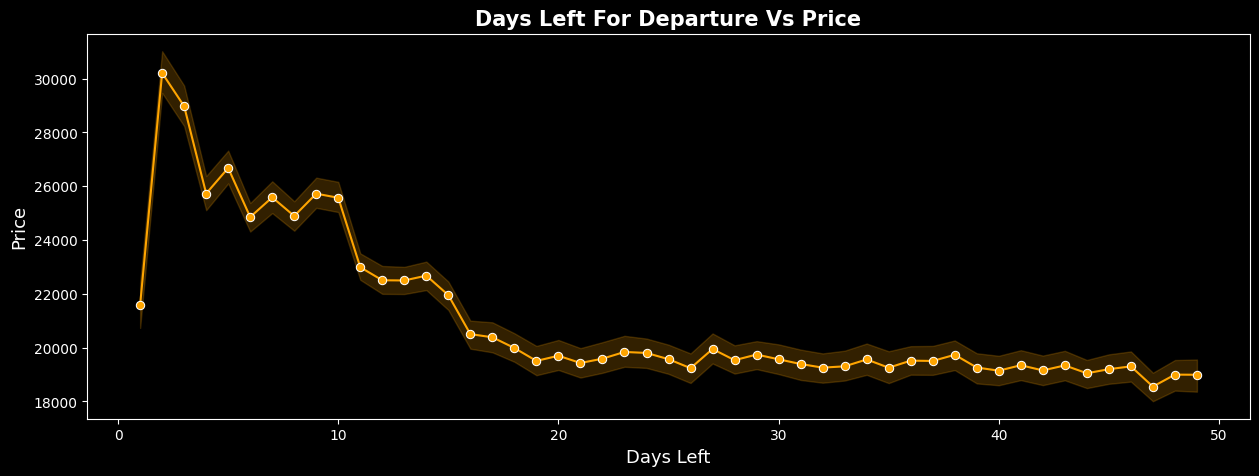

In [238]:
# The price of the ticket increases as the days left for departure decreases through  lineplot
plt.style.use('dark_background')
plt.figure(figsize =(15,5))
sns.lineplot(data = df, x = "days_left", y= "price", color = 'orange', marker = 'o')
plt.title("Days Left For Departure Vs Price", fontweight = 'bold', fontsize = 15)
plt.xlabel("Days Left", fontsize = 13)
plt.ylabel("Price", fontsize = 13)
plt.show()

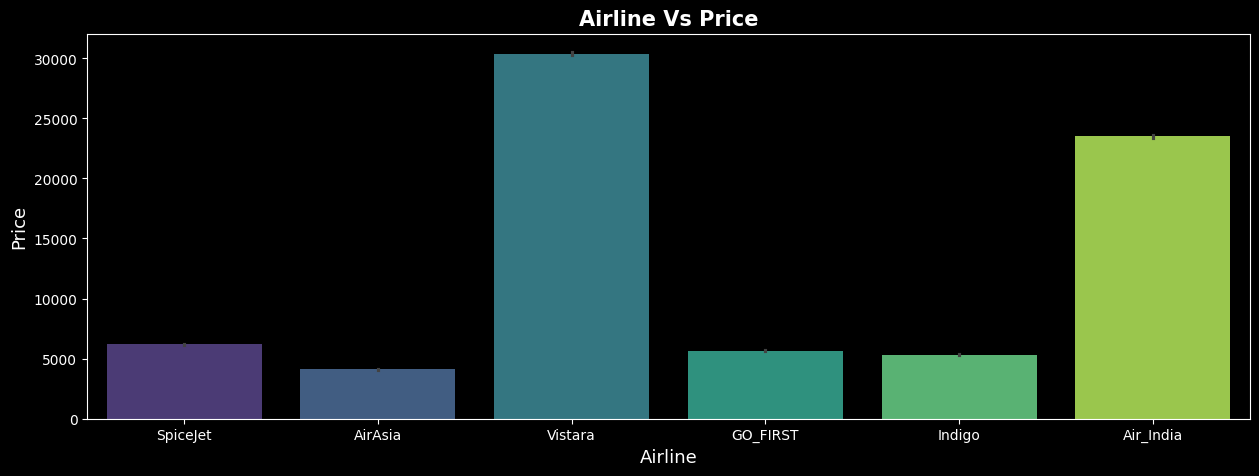

In [239]:
# Price range of all the flights throught barplot
plt.figure(figsize=(15,5))
sns.barplot(data= df, x = "airline", y = "price",  palette="viridis")
plt.title("Airline Vs Price", fontweight = 'bold', fontsize = 15)
plt.xlabel("Airline", fontsize = 13)
plt.ylabel("Price", fontsize = 13)
plt.show()

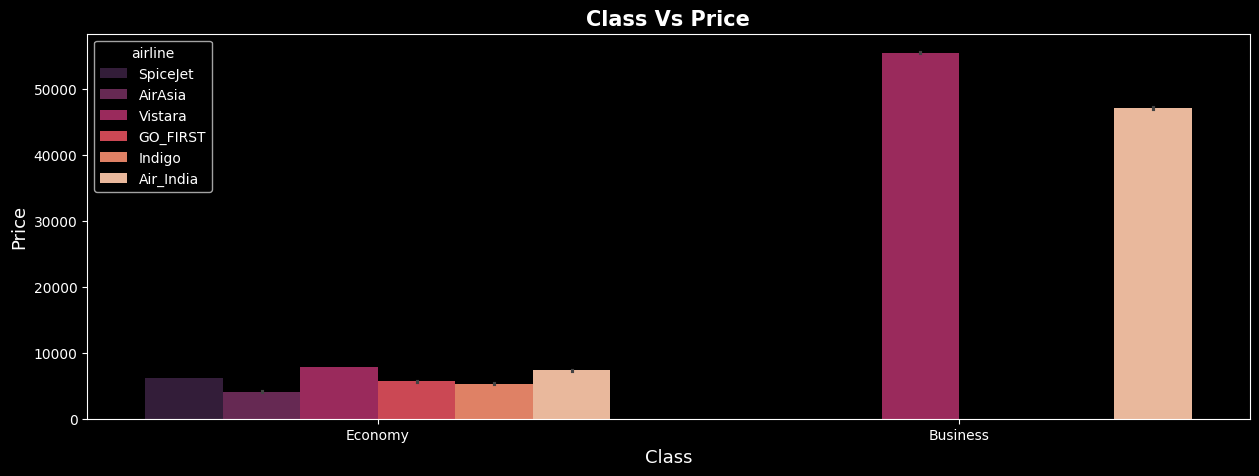

In [240]:
 # Range of price of all the flights of Economy and Business class
plt.figure(figsize=(15,5))
sns.barplot(data = df, x = "class", y= "price", hue = "airline", palette = 'rocket')
plt.title("Class Vs Price", fontweight = 'bold', fontsize = 15)
plt.xlabel("Class", fontsize = 13)
plt.ylabel("Price", fontsize = 13)
plt.show()

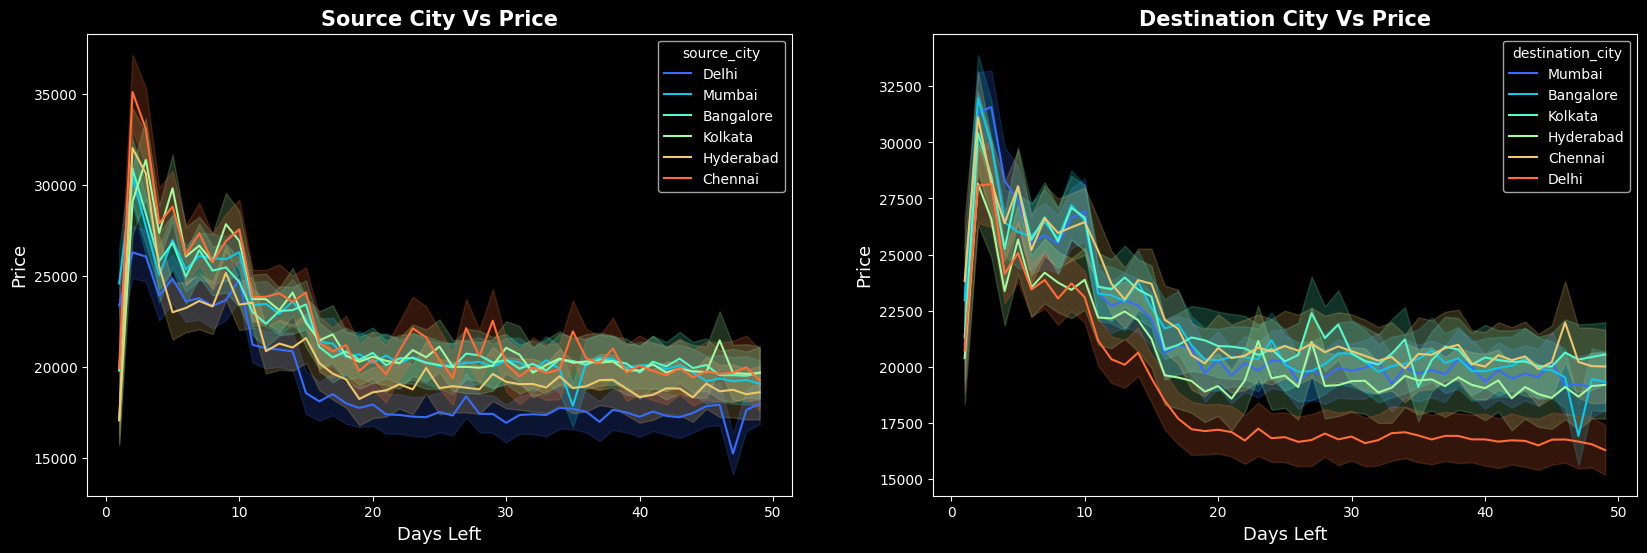

In [241]:
 # Range of price of flights with source and destination city according to the  days left

fig,ax = plt.subplots(1,2,figsize=(20,6))
sns.lineplot(data = df, x ="days_left", y = "price", hue ="source_city", ax =ax[0],palette="rainbow")
sns.lineplot(data = df, x ="days_left", y = "price", hue ="destination_city", ax =ax[1],palette = "rainbow")
ax[0].set_title("Source City Vs Price", fontweight = 'bold', fontsize = 15)
ax[1].set_title("Destination City Vs Price", fontweight = 'bold', fontsize = 15)
ax[0].set_xlabel("Days Left", fontsize = 13)
ax[1].set_xlabel("Days Left", fontsize = 13)
ax[0].set_ylabel("Price", fontsize = 13)
ax[1].set_ylabel("Price", fontsize = 13)
plt.show()

Text(0.5, 1.0, 'Frequency of Class')

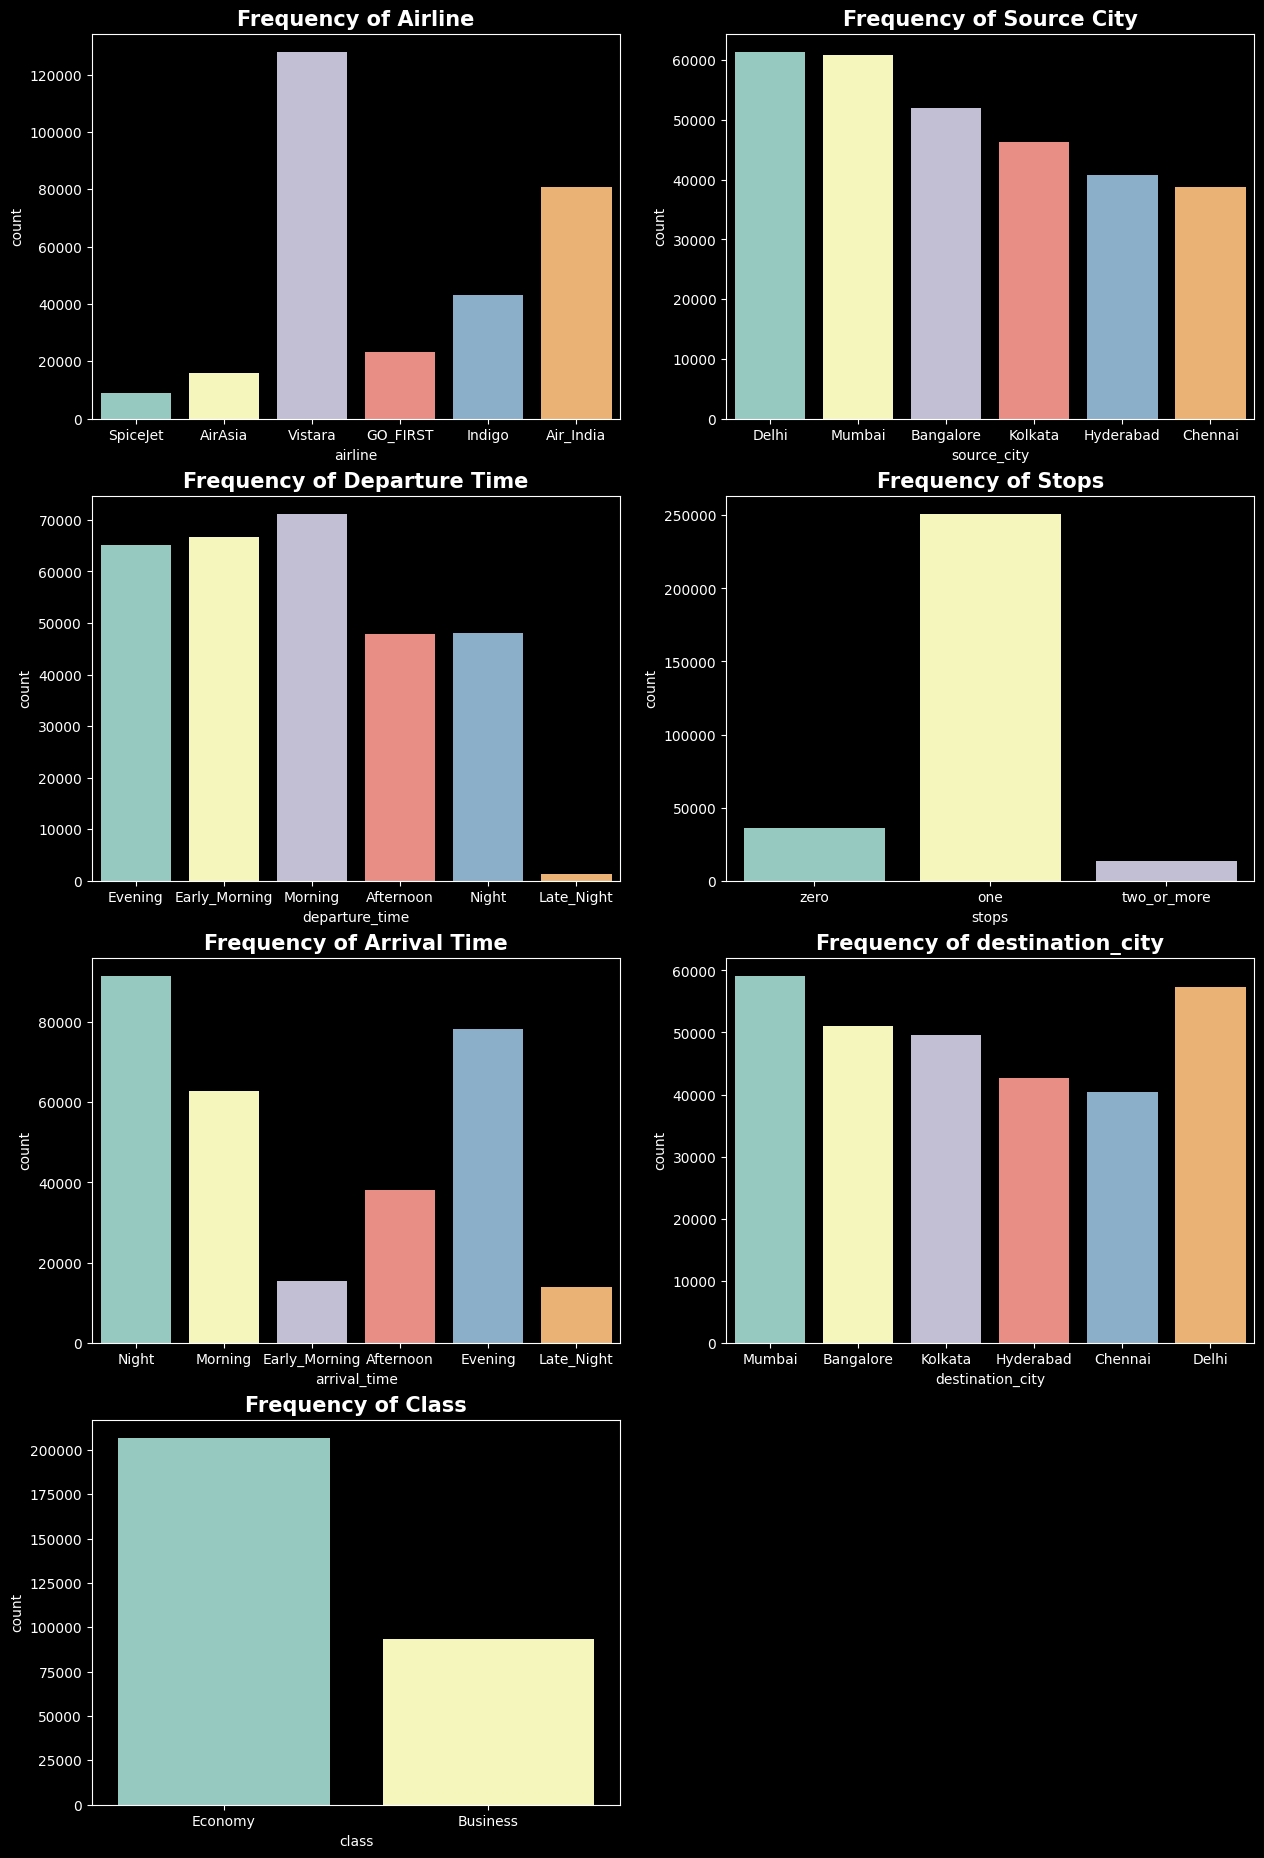

In [242]:
 # Visualization of categorical features with countplot
plt.figure(figsize = (15,23))

plt.subplot(4,2,1)
sns.countplot(data= df, x="airline",hue = "airline")
plt.title("Frequency of Airline", fontweight = 'bold', fontsize = 15)

plt.subplot(4,2,2)
sns.countplot(data= df, x="source_city",hue = "source_city")
plt.title("Frequency of Source City", fontweight = 'bold', fontsize = 15)

plt.subplot(4,2,3)
sns.countplot(data= df, x="departure_time",hue = "departure_time")
plt.title("Frequency of Departure Time", fontweight = 'bold', fontsize = 15)

plt.subplot(4,2,4)
sns.countplot(data= df, x="stops",hue = "stops")
plt.title("Frequency of Stops", fontweight = 'bold', fontsize = 15)

plt.subplot(4,2,5)
sns.countplot(data= df, x="arrival_time",hue = "arrival_time")
plt.title("Frequency of Arrival Time", fontweight = 'bold', fontsize = 15)

plt.subplot(4,2,6)
sns.countplot(data= df, x="destination_city",hue = "destination_city")
plt.title("Frequency of destination_city", fontweight = 'bold', fontsize = 15)

plt.subplot(4,2,7)
sns.countplot(data= df, x="class",hue = "class")
plt.title("Frequency of Class", fontweight = 'bold', fontsize = 15)

# **Label Encoding**

In [243]:
# Converting the object or text based datatype to numeric datatype for best output
from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()

for i in df.columns:
  if df[i].dtype == "object":
    df[i] = le.fit_transform(df[i])


In [244]:
df.dtypes

,0
airline,int64
flight,int64
source_city,int64
departure_time,int64
stops,int64
arrival_time,int64
destination_city,int64
class,int64
duration,float64
days_left,int64


# **Feature Selection**

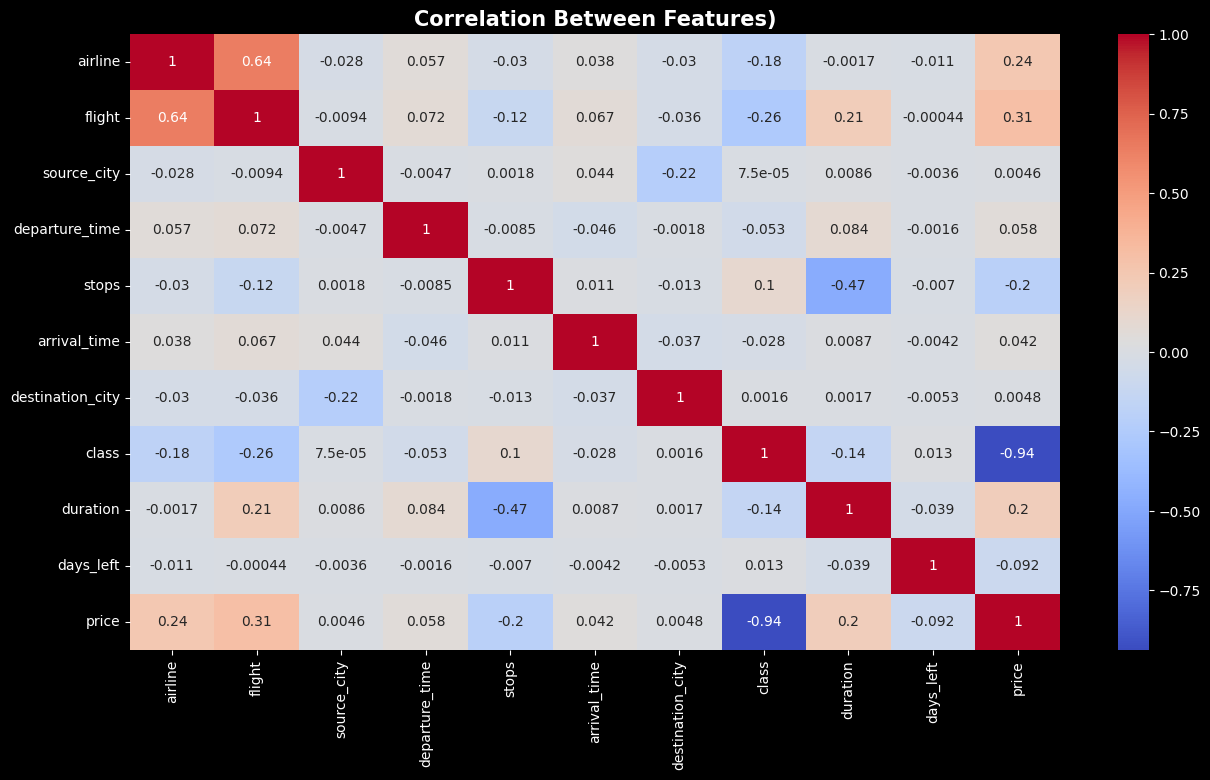

In [245]:
 # Plotting the correlation graph to see the correlation between features and dependent variable
correlation = df.corr()
plt.figure(figsize= (15,8))
sns.heatmap(correlation, annot = True, cmap = "coolwarm")
plt.title("Correlation Between Features)", fontweight = 'bold', fontsize = 15)
plt.show()

In [246]:
# Selecting the features using VIF.VIF should be less than 5.So drop the stops feature.

from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []
for col in df.columns:
    if df[col].dtype != 'object' and col != 'price':
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data["Features"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,Features,VIF
0,airline,6.701818
1,flight,12.675046
2,source_city,2.969540
3,departure_time,2.806009
4,stops,1.437326
5,arrival_time,3.784873
6,destination_city,2.918792
7,class,2.852072
8,duration,4.754588
9,days_left,4.071591


In [247]:
col_list = []
for col in df.columns:
    if df[col].dtype != 'object' and col != 'flight' and col != 'price':
        col_list.append(col)

X = df[col_list]
vif_data = pd.DataFrame()
vif_data["Features"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,Features,VIF
0,airline,3.393124
1,source_city,2.927766
2,departure_time,2.779427
3,stops,1.426614
4,arrival_time,3.684550
5,destination_city,2.885337
6,class,2.849370
7,duration,4.113876
8,days_left,3.976790


# **Linear Regression**

In [248]:
# Dividing the Data into X and y

X= df.drop(["price"],axis = 1)
y= df["price"]

In [249]:
# Split into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)


In [250]:
# Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [251]:
# Apply linear Regression and predict the X_test values
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [252]:
# Create a DataFrame to compare the actual and predicted values
difference = pd.DataFrame({"Actual_Value": y_test, "Predicted_Value" : y_pred})
difference

,Actual_Value,Predicted_Value
27131,7366,4567.013416
266857,64831,52844.339673
141228,6195,7904.949552
288329,60160,56121.015486
97334,6578,6672.773495
...,...,...
5234,5026,5824.337078
5591,3001,371.004613
168314,6734,5843.835285
175191,5082,-1684.520514


In [275]:
# Calculating r2 score,MAE, MAPE, MSE, RMSE
# Lower the RMSE and MAPE better the model.

from sklearn.metrics import *
lr_r2_score= r2_score(y_test,y_pred)*100
print(f'r2_score: {lr_r2_score}')
mae = mean_absolute_error(y_test,y_pred)
print(f'MAE: {mae}')
mape = mean_absolute_percentage_error(y_test,y_pred)*100
print(f'MAPE: {mape}')
mse = mean_squared_error(y_test,y_pred)
print(f'MSE: {mse}')
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'RMSE: {rmse}')

r2_score: 90.45747930770209
MAE: 4622.187103361354
MAPE: 43.44404640025131
MSE: 49190002.62043739
RMSE: 7013.558484851851


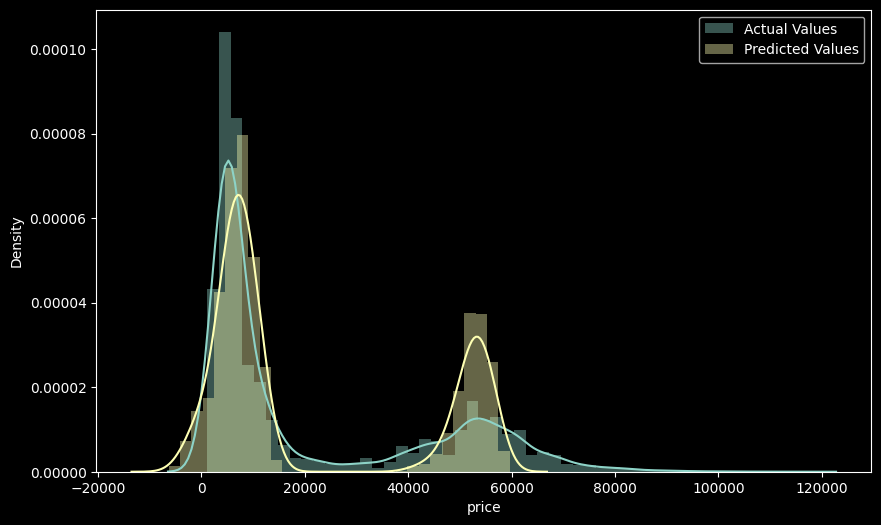

In [265]:
 # Plotting the graph of actual and predicted price of flight
plt.figure(figsize=(10, 6))
sns.distplot(y_test,label='Actual Values')
sns.distplot(y_pred,label='Predicted Values')
plt.legend()
plt.show()

# **Decision Tree Regressor**

In [255]:
# Apply Decision Tree Regressor data and predict the X_test values

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

dtr.fit(X_train,y_train)
y_pred_dtr = dtr.predict(X_test)


In [258]:
# Calculating r2 score,MAE, MAPE, MSE, RMSE
# Lower the RMSE and MAPE better the model.
from sklearn.metrics import *

dtr_r2_score = r2_score(y_test,y_pred_dtr)*100
print(f'dtr_r2_score: {dtr_r2_score}')

dtr_mae = mean_absolute_error(y_test,y_pred_dtr)
print(f'dtr_MAE: {dtr_mae}')

dtr_mape = mean_absolute_percentage_error(y_test,y_pred_dtr)*100
print(f'dtr_MAPE: {dtr_mape}')

dtr_mse = mean_squared_error(y_test,y_pred_dtr)
print(f'dtr_MSE: {dtr_mse}')

dtr_rmse = np.sqrt(mean_squared_error(y_test,y_pred_dtr))
print(f'dtr_RMSE: {dtr_rmse}')

dtr_r2_score: 98.27710672993597
dtr_MAE: 891.4967405729262
dtr_MAPE: 5.960064300248424
dtr_MSE: 8881209.399691178
dtr_RMSE: 2980.1358022229756


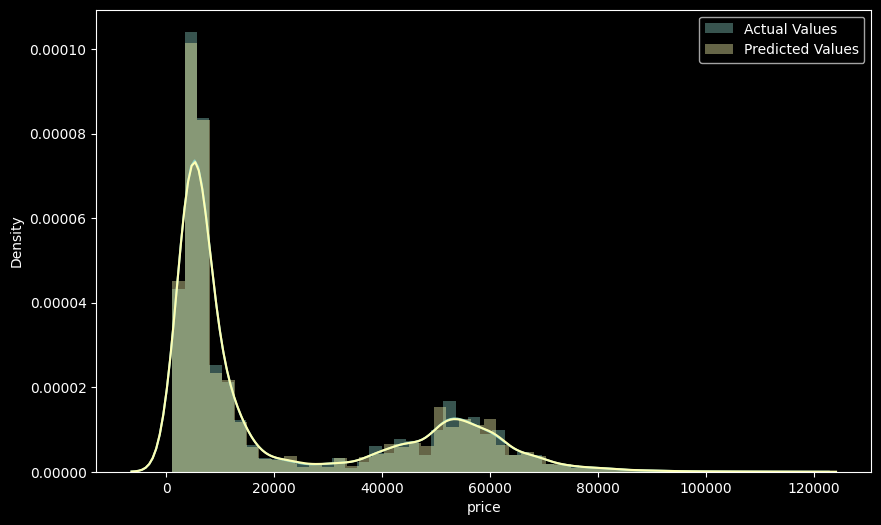

In [262]:
# Plotting the graph of actual and predicted price of flight
plt.figure(figsize=(10, 6))
sns.distplot(y_test, label = "Actual Values")
sns.distplot(y_pred_dtr, label = "Predicted Values")
plt.legend()
plt.show()

# **Random Forest Regressor**

In [271]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

In [273]:
from sklearn.metrics import *

rfr_r2_score = r2_score(y_test,y_pred_rfr)*100
print(f'R2_score: {rfr_r2_score}')

rfr_mae = mean_absolute_error(y_test,y_pred_rfr)
print(f'MAE: {rfr_mae}')

rfr_mape = mean_absolute_percentage_error(y_test,y_pred_rfr)*100
print(f'MAPE: {rfr_mape}')

rfr_mse = mean_squared_error(y_test,y_pred_rfr)
print(f'MSE: {rfr_mse}')

rfr_rmse = np.sqrt(mean_squared_error(y_test,y_pred_rfr))
print(f'RMSE: {rfr_rmse}')

R2_score: 98.95122380873306
MAE: 863.5117003746477
MAPE: 5.718384801605159
MSE: 5406255.355391801
RMSE: 2325.1355563475868


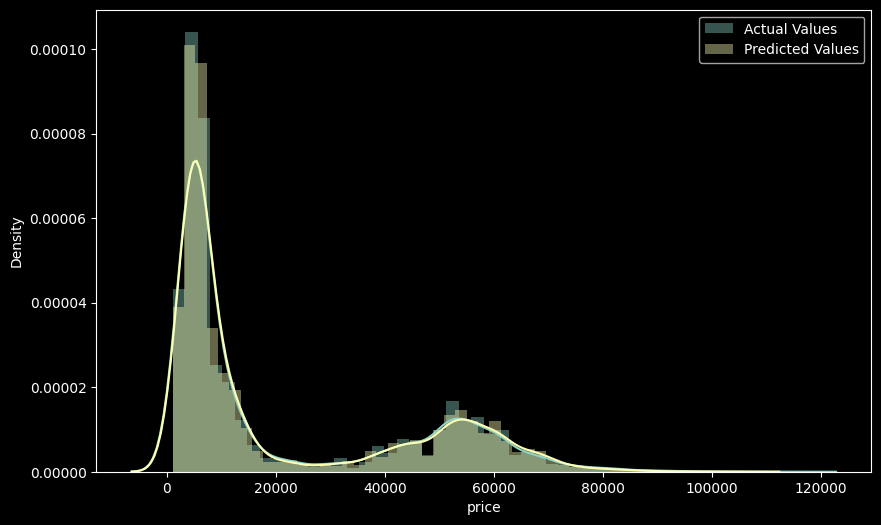

In [266]:
plt.figure(figsize=(10, 6))
sns.distplot(y_test, label = "Actual Values")
sns.distplot(y_pred_rfr, label = "Predicted Values")
plt.legend()
plt.show()

In [277]:
# Create a final DataFrame to compare the performance of all three models
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_scores = [lr_r2_score, dtr_r2_score, rfr_r2_score]
mae_scores = [mae, dtr_mae, rfr_mae]
mape_scores = [mape, dtr_mape, rfr_mape]
mse_scores = [mse, dtr_mse, rfr_mse]
rmse_scores = [rmse, dtr_rmse, rfr_rmse]

final_comparison_df = pd.DataFrame({
    'Model': models,
    'R2 Score': r2_scores,
    'MAE': mae_scores,
    'MAPE': mape_scores,
    'MSE': mse_scores,
    'RMSE': rmse_scores
})

final_comparison_df

,Model,R2 Score,MAE,MAPE,MSE,RMSE
0,Linear Regression,90.457479,4622.187103,43.444046,4.919000e+07,7013.558485
1,Decision Tree,98.277107,891.496741,5.960064,8.881209e+06,2980.135802
2,Random Forest,98.951224,863.511700,5.718385,5.406255e+06,2325.135556
